In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat

### Western Electric Rules

Rule 1: Any single data point falls outside the 3σ-limit from the centerline (i.e., any point that falls outside Zone A, beyond either the upper or lower control limit)

Rule 2: Two out of three consecutive points fall beyond the 2σ-limit (in zone A or beyond), on the same side of the centerline

Rule 3: Four out of five consecutive points fall beyond the 1σ-limit (in zone B or beyond), on the same side of the centerline.

Rule 4	Nine consecutive points fall on the same side of the centerline (in zone C or beyond).

In [2]:
def rando():
    theNum = np.random.randint(50,100)
    return theNum

In [3]:
def testRule1(obj,newNum, mean, sd):
    sigUp = mean + sd*3
    sigDown = mean - sd*3
    code = (newNum > sigUp) or (newNum < sigDown)
    obj['format_1'] = np.append(obj['format_1'],code)
    return

In [4]:
def testRule2(obj, newNum, mean, sd):
    twoSigUp = mean + sd*2
    twoSigDown = mean - sd*2
    temp_clipped = obj['all_vals'][-2:]
    temp_clipped = np.append(temp_clipped,newNum)
    above2 = temp_clipped > twoSigUp
    below2 = temp_clipped < twoSigDown
    code = (above2.sum(axis=0) >= 2) or (below2.sum(axis=0) >= 2)
    obj['format_2'] = np.append(obj['format_2'],code)
    return    

In [5]:
def testRule3(obj, newNum, mean, sd):
    oneSigUp = mean + sd
    oneSigDown = mean - sd
    temp_clipped = obj['all_vals'][-5:]
    temp_clipped = np.append(temp_clipped,newNum)
    above1 = temp_clipped > oneSigUp
    below1 = temp_clipped < oneSigDown
    code = (above1.sum(axis=0) >= 4) or (below1.sum(axis=0) >= 4)
    obj['format_3'] = np.append(obj['format_3'],code)
    return

In [6]:
def testRule4(obj, newNum, mean):
    temp_clipped = obj['all_vals'][-8:]
    temp_clipped = np.append(temp_clipped,newNum)
    above = temp_clipped > mean
    below = temp_clipped < mean
    code = (above.sum(axis=0) >= 9) or (below.sum(axis=0) >= 9)
    obj['format_4'] = np.append(obj['format_4'],code)
    return

In [7]:
def violations(obj,datum):
    theMean = np.mean(obj['all_vals'])
    sd = np.std(obj['all_vals'])
    testRule1(obj,datum, theMean, sd)
    testRule2(obj,datum, theMean, sd)
    testRule3(obj,datum, theMean, sd)
    testRule4(obj,datum, theMean)
    return

In [8]:
def assign_datum(obj,datum = None):
    if(datum is None):
        datum = rando()
    violations(obj,datum)
    obj['all_vals'] = np.append(obj['all_vals'],datum)
    return
    

In [9]:
trendObj = {'all_vals': np.random.randint(50, 100, size=100),
            'format_1': np.zeros(100),
            'format_2': np.zeros(100),
            'format_3': np.zeros(100),
            'format_4': np.zeros(100),
           }


In [10]:
#Return the value's index if rule has been violated.  This is used for formatting.
def format_arr(rule):
    rule_arr = 'format_' + str(rule)
    return [index for index,val in enumerate(trendObj[rule_arr]) if val]


In [32]:
def plotAxlines(array):
    theMean = np.mean(array)
    sd = np.std(array)
    colors = ['black','green','yellow','red']
    for level,color in enumerate(colors):
        upper = theMean + sd*level
        lower = theMean - sd*level
        plt.axhline(y=upper, linewidth=1, color=color)
        plt.axhline(y=lower, linewidth=1, color=color)
    return              

In [21]:
assign_datum(trendObj,82)

In [23]:
print(trendObj['all_vals'])
print(trendObj['format_1'])
print(trendObj['format_2'])
print(trendObj['format_3'])
print(trendObj['format_4'])


[ 69  80  50  54  89  91  89  53  82  94  96  81  91  99  83  56  56  62
  60  91  59  81  97  66  64  86  92  97  85  77  78  62  96  64  66  94
  68  66  63  71  72  53  52  93  70  84  85  52  69  90  65  72  60  64
  84  86  63  95  62  86  92  58  78  64  97  68  92  79  64  66  90  54
  50  96  66  80  51  82  93  65  97  78  86  91  50  57  80  89  78  91
  82  94  81  98  76  68  65  68  99  82  95 120 140  81  82  84  86  82]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.

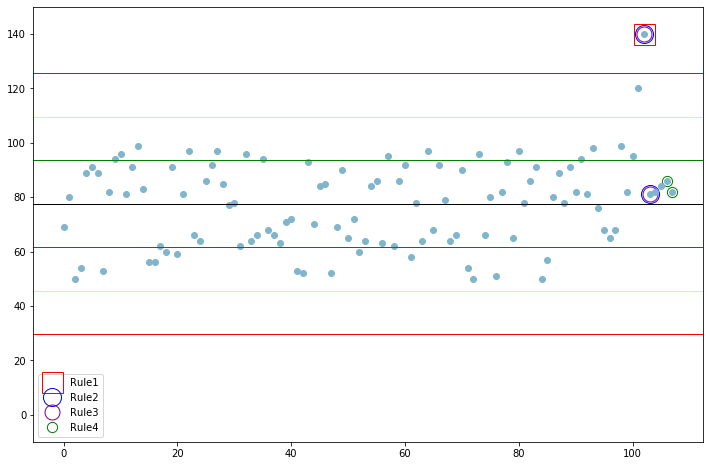

In [34]:
#Plot all values and the formatting arrays to show violations
mark = 6.0
plt.figure(figsize=(12,8))
plt.plot(trendObj['all_vals'], color='red',markevery=format_arr(1), ls="", marker='s',mfc = 'none', mec='red', label="Rule1", markersize=mark*3.5)
plt.plot(trendObj['all_vals'], color='blue',markevery=format_arr(2), ls="", marker='o', mfc='none',mec='blue',label="Rule2", markersize=mark*3)
plt.plot(trendObj['all_vals'], color='blue',markevery=format_arr(3), ls="", marker='o', mfc='none',mec='purple',label="Rule3", markersize=mark*2.5)
plt.plot(trendObj['all_vals'], color='blue',markevery=format_arr(4), ls="", marker='o', mfc='none',mec='green',label="Rule4", markersize=mark*1.7)
plt.plot(trendObj['all_vals'], color='#81B5CB', ls="", marker="o", markersize=mark)
plotAxlines(trendObj['all_vals'])
plt.legend()
plt.ylim(-10, 150)
#plt.savefig('control-chart.png')
plt.show()